# Feature Engineering

Welcome to the Feature Engineering lesson. In this lesson we will be covering: 

1. What is feature engineering & why it is important. 
2. How feature engineering is used. 
- 2a. Correlation
3. Methods
- 3a. Scaling
- 3b. Mean Encoding 
- 3c. Can apply any mathimatical transform based on your need. Can talk baout how companies make their own and this is how they can pull vital information out of it
4. Overview 

#### What is feature engineering? 
- Feature engineering is the process in which raw data is transformed to be able to solve the problem at hand.
- This is done by combining and transforming existing features into new features. 
- Features are also referred to as "variables" or "attributes". 
- The main goal is to make your data better suited for a good model. 
- The raw data may have over 100 variables, but with feature engineering you will be able to narrow it down to only include those variables that are useful and have a relationship with your target. 


- For example, let's say you are trying to predict whether a particular customer will continue to use your product. 
     - You are given 5 years worth of customer logs.
     - In this case, you would conduct feature engineering to transform the logs into a consumable dataset. 
     - For each user, one feature would contain the price of the subscription. 
     - Other features could contain the frequency of connections per day, week and year. 
     - Another feature would contain the average session duration in seconds.
     - Everything measurable can be used as a feature. 
     - Your main goal is to create <b>informative</b> features. 
     
     
#### Why is feature engineering important? 
- It allows you to prepare the proper input dataset aligned with the machine learning algorithm requirements. 
- It improves the performance of machine learning models. 


#### Feature Engineering vs. Feature Selection 
- Feature engineering allows us to create new features from the ones that are already part of the dataset to help improve the model. 
- Feature selection allows us to select features from the entire pool of features (including those newly-engineered) that will help ML models more efficiently make predictions on the target variable. 
- In a typical pipeline, feature selection is done after completing feature engineering. 


- Dimensionality reduction is a concept that tends to be combined with feature selection. It reduces the number of features in a dataset (as feature selection methods do) but there is a difference. 
    - Feature selection selects and excludes some features without modifying them at all. 
    - Dimensionality reduction modifies or transforms features into a lower dimension by creating a whole new feature space that looks like the first one, but smaller in terms of dimensions. 


### Misc info for slides***

- Feature engineering involves several processes: 
    - Feature selection - choosing a set of features from a large collection
    - Feature transformation - creating features using existing data through mathematical operations 
    - Feature construction - developing new features apart from those already generated 
    - Feature extraction - reducing the dimensionality of a dataset by combining existing features into new ones therefore reducing the # of features in the dataset
    
#### FYI: Common feature engineering techniques
- Imputation
- One-hot encoding
- Grouping operations 
- Log transformation 
- Bag of words
- Feature hashing


## Methods (Feature Engineering + Feature Scaling)

##### Continuous Variables
- <b>Normalization</b> is the process of convering an actual range of values into a standard range of values, typically between the intervals of [-1,1] or [0,1].
    - Why do we normalize? Normalizing data can lead to an increased speed of learning. It is also useful to ensure that our inputs are around the same relatively small range to avoid problems which computers have when working with very small or large numbers. 
    
    
- <b>Standardization</b> is also known as z-score normalization. It is the process in which feature values are rescaled so that they follow a standard normal distribution with mean of 0 and standard deviation of 1. 


- Data <b>Imputation</b> Techniques: 
    - One technique consists of replacing the missing value of a feature by an average value of this feature. 
    - Another technique is to replace the missing value with a value outside the normal range of values. The idea is that the learning algorithm will learn what is best to do when the feature has a value significantly different from regular values. 
    
    
- <b>Correlation</b> is feature selection technique that helps understand the relationship between multiple variables. 
    - It can sometimes indicate the presence of causal relationship. 
    - If your dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called - "multicollinearity". 
        - <b>Multicollinearity</b> happens when one predictor variable in regression model can be linearly predicted from the others with high degree of accuracy. This can lead to skewed or misleading results. This problem needs to be fixed before training logistic or linear regression models. 
  
  
- Before you start working on the problem, you may not be able to tell which data imputation technique will work the best. You will have to try different techniques by building several models and selecting the best one. 

##### Categorical Variables
- Categorical variables can easily be understood by humans, but they need to be transformed in order for them to be understood by machine learning models. 

- <b>One-hot encoding</b> converts <i>n</i> categories into <i>n</i> features. This can be done through the get_dummies() function to one-hot encode columns. 

- <b>Dummy encoding</b> creates <i>n-1</i> features for <i>n</i> categories, omitting the first category. In dummy encoding, the base value is encoded by the absence of all other categorical values. You can use the same get_dummies() function with an additional argument, drop_first set to True. 

- Both have advantages & disadvantages: 
    - One-hot encoding creates more explainable features as each value will have its own column therefore its own weight that can be observed after training. However, it may create features that are entirely collinear due to the same information being represented multiple times. 
    - For example, a simple categorical column showing the sex of titanic passengers. By recording a 1 for male, the info of whether person is female is already known when male column is 0. This double representation can cause misinterpretation and dummy values would be more appropriate. 
    - However, both techniques may result in huge number of columns being created. In this case you may want to only include the most common values. You can use the value_counts() function to check the number of occurences. 


### Our goal will be to build a model that predicts whether a passenger survived the titanic.

For this lesson we will again be using the Titanic Survival Dataset from Kaggle.

Let's review the column values once more as a reminder of the data we are using:

- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain ?)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin: Cabin number of the passenger (Some entries contain ?)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
- Boat: Lifeboat (if survived)
- Body: Body Number (if did not survive and body was recovered)
- Home.Dest: Home / Destination

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import titanic dataset
titanic_data = pd.read_csv("titanic_data.csv")
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


### Before we start our feature engineering process, we will need to handle our missing values.
We will need to first get rid of the question marks. Then we will take a look at the percentage of null values.

#### Review from last week:

In [2]:
# replace ? with none
titanic_data = titanic_data.replace({'?': None})

# change the type of the age and fare columns to numeric
titanic_data['age'] = pd.to_numeric(titanic_data['age'], errors = 'coerce')
titanic_data['fare'] = pd.to_numeric(titanic_data['fare'], errors = 'coerce')

# Lets round the age values
titanic_data['age'] = round(titanic_data['age'])

# lets check for null values again
titanic_data.isnull().sum()/len(titanic_data)*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

We see there are a few features that a large amount of nulls. 

***Should we get rid of them?*** ---> This is one technique of <b>dimensionality reduction</b> which is part of feature engineering! 

In this case, there is no right or wrong percentage threshold. However, if a large portion of data is missing, it may be best to remove the column since imputating may add bias to our models. But before we do that...

We need to first ask ourselves the reason behind why the data may be missing. 

- Cabin: we may assume that the missing values are because some passengers may not have had cabins, which could tell you something about whether or not they survived (missing data = perhaps no cabin, survived)
- Embarked: we may assume that missing values are because some passengers may not have given this info (small percentage)
- Boat: indicates whether or not they survived (missing data = perhaps did not survive)
- Body: indicates whether or not they survived (missing data = perhaps survived)
- Home.Dest: we may assume that missing values are because some passengers may not have given this info 

Since the only variable with large missing value percentage not associated with survival is home.dest, let's look at the number of occurrences to see if we see any pattern. If there is a pattern, we can feature engineer this column to be more useful.

In [3]:
#Let's look at the percentage of occurrences 
titanic_data["home.dest"].value_counts()/titanic_data["home.dest"].value_counts().sum()*100

New York, NY                                       8.590604
London                                             1.879195
Montreal, PQ                                       1.342282
Paris, France                                      1.208054
Cornwall / Akron, OH                               1.208054
                                                     ...   
London Skanteales, NY                              0.134228
Weston-Super-Mare / Moose Jaw, SK                  0.134228
Winnipeg, MN                                       0.134228
Kingwilliamstown, Co Cork, Ireland New York, NY    0.134228
Omaha, NE                                          0.134228
Name: home.dest, Length: 369, dtype: float64

- The home/destination with the highest percentage is New York, NY with 8.6% of passengers arriving at this destination. The total number of locations is 369. 
- Since this is a large spread and the highest occurrence is less than 10%, it is safe to assume there are no patterns detected and we can remove this column. 

In [4]:
#Removing the home.dest column
titanic_data = titanic_data.drop(columns=['home.dest'])

titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,None
1,1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,151.5500,C22 C26,S,11,None
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,None,None
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,None,135
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,None,None


### Feature creation & extraction

Now let's consider the other 3 out of 4 variables - cabin, boat, and body. Since these features may help us predict survival, we can transform them so they are more useful to our model. 

In [5]:
#Instead of using cabin number, let's create a new column showing whether or not the passenger had a cabin

titanic_data['has_cabin'] = ~titanic_data.cabin.isnull()

titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,has_cabin
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,None,True
1,1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,151.5500,C22 C26,S,11,None,True
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,None,None,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,None,135,True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,None,None,True


In [6]:
#We will now repeat this process using the boat and body columns 

titanic_data['has_boat'] = ~titanic_data.boat.isnull()
titanic_data['has_body'] = ~titanic_data.body.isnull()

titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,has_cabin,has_boat,has_body
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,None,True,True,False
1,1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,151.5500,C22 C26,S,11,None,True,True,False
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,None,None,True,False,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,None,135,True,False,True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,None,None,True,False,False


If we take a look at the name column, we see there are titles within the names such as Miss, Master, Mr., Mrs., etc. 

We can conduct feature engineering on this column by creating a new column showing the title. This information may be useful to understand social status, profession, etc. which could help us understand the passengers' chances of survival.

We can use regular expressions to extract the title from each name. You can visit these links to learn more about regular expressions: 
- https://docs.python.org/3/howto/regex.html 
- https://docs.python.org/3/library/re.html

In [7]:
#Extracting title from the names and storing into a new column 
import re

titanic_data['title'] = titanic_data.name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,has_cabin,has_boat,has_body,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,None,True,True,False,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,1.0,1,2,113781,151.5500,C22 C26,S,11,None,True,True,False,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,None,None,True,False,False,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,None,135,True,False,True,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,None,None,True,False,False,Mrs


<AxesSubplot:>

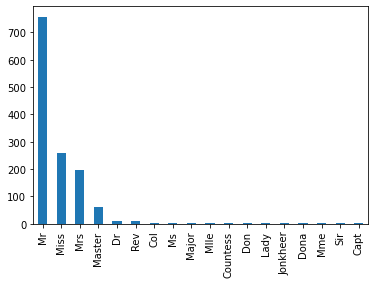

In [8]:
#Let's plot the title column to see how this looks
titanic_data['title'].value_counts().plot(kind='bar')

We see there are several titles that are less common. To help our model with its prediction, we can group the less common titles into one single group. 

<AxesSubplot:>

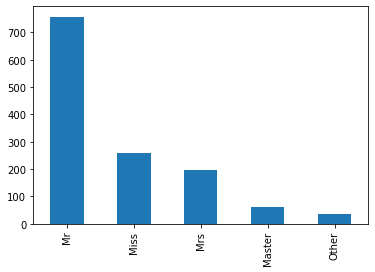

In [9]:
#Grouping all columns as "Other"
titanic_data['title'] = titanic_data['title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                    'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer', 'Ms', 'Mlle', 'Mme'],'Other')

#Plotting the results
titanic_data['title'].value_counts().plot(kind='bar')

We can now drop the irrelevant columns that are no longer needed.

In [11]:
#Removing the name, cabin, boat, body, ticket columns
titanic_data = titanic_data.drop(columns=['name','ticket', 'cabin', 'boat', 'body'])

titanic_data.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,has_cabin,has_boat,has_body,title
0,1,1,female,29.0,0,0,211.3375,S,True,True,False,Miss
1,1,1,male,1.0,1,2,151.5500,S,True,True,False,Master
2,1,0,female,2.0,1,2,151.5500,S,True,False,False,Miss
3,1,0,male,30.0,1,2,151.5500,S,True,False,True,Mr
4,1,0,female,25.0,1,2,151.5500,S,True,False,False,Mrs
5,1,1,male,48.0,0,0,26.5500,S,True,True,False,Mr
6,1,1,female,63.0,1,0,77.9583,S,True,True,False,Miss
7,1,0,male,39.0,0,0,0.0000,S,True,False,False,Mr
8,1,1,female,53.0,2,0,51.4792,S,True,True,False,Mrs
9,1,0,male,71.0,0,0,49.5042,C,False,False,True,Mr


Now let's look at the embarked column. Since there is only less than 1% of missing data, we can impute the missing values using the most common value - i.e. the mode. 

In [18]:
#How many missing values do we have?

titanic_data.embarked.isnull().sum()

0

In [13]:
#What are the other values? 
titanic_data.embarked.unique()

array(['S', 'C', None, 'Q'], dtype=object)

In [ ]:
#What is the most common occurrence? 
titanic_data.embarked.value_counts()

In [ ]:
#We can impute the missing values by replacing None with the mode
titanic_data['embarked'].fillna(titanic_data.embarked.mode()[0], inplace=True)

titanic_data.embarked.value_counts()

In [ ]:
### Exercise 1

#Feature engineer a new column by combining the "sibsp" and "parch" columns

### Dummy Encoding - Transforming categorical variables into numerical variables



In [24]:
#Creating a new dataframe that contains dummy variables 
titanic_data = pd.get_dummies(titanic_data, drop_first=True)
titanic_data.head(20)

,pclass,survived,age,sibsp,parch,fare,has_cabin,has_boat,has_body,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
0,1,1,29.0,0,0,211.3375,True,True,False,0,0,1,1,0,0,0
1,1,1,1.0,1,2,151.5500,True,True,False,1,0,1,0,0,0,0
2,1,0,2.0,1,2,151.5500,True,False,False,0,0,1,1,0,0,0
3,1,0,30.0,1,2,151.5500,True,False,True,1,0,1,0,1,0,0
4,1,0,25.0,1,2,151.5500,True,False,False,0,0,1,0,0,1,0
5,1,1,48.0,0,0,26.5500,True,True,False,1,0,1,0,1,0,0
6,1,1,63.0,1,0,77.9583,True,True,False,0,0,1,1,0,0,0
7,1,0,39.0,0,0,0.0000,True,False,False,1,0,1,0,1,0,0
8,1,1,53.0,2,0,51.4792,True,True,False,0,0,1,0,0,1,0
9,1,0,71.0,0,0,49.5042,False,False,True,1,0,0,0,1,0,0


#### Congratulations, we've now completed a few feature engineering techniques! 

#### But wait........ there's more!

Now let's go back to our dataframe and see what other features still contain missing values. 

In [25]:
# lets check for null values again
titanic_data.isnull().sum()/len(titanic_data)*100

pclass         0.0
survived       0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
has_cabin      0.0
has_boat       0.0
has_body       0.0
sex_male       0.0
embarked_Q     0.0
embarked_S     0.0
title_Miss     0.0
title_Mr       0.0
title_Mrs      0.0
title_Other    0.0
dtype: float64

In [ ]:
#Let's plot the 3 variables *******

Let's impute missing data for the remaining 2 numerical features.

Let's replace "age" and "fare" columns with the median value.

In [34]:
# Impute missing values for 'age' and 'fare'
titanic_data['age'] = titanic_data.age.fillna(titanic_data.age.mean())
titanic_data['fare'] = titanic_data.fare.fillna(titanic_data.fare.mean())

In [35]:
titanic_data.head(5)

,pclass,survived,age,sibsp,parch,fare,has_cabin,has_boat,has_body,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
0,1,1,29.0,0,0,211.3375,True,True,False,0,0,1,1,0,0,0
1,1,1,1.0,1,2,151.5500,True,True,False,1,0,1,0,0,0,0
2,1,0,2.0,1,2,151.5500,True,False,False,0,0,1,1,0,0,0
3,1,0,30.0,1,2,151.5500,True,False,True,1,0,1,0,1,0,0
4,1,0,25.0,1,2,151.5500,True,False,False,0,0,1,0,0,1,0


Let's plot the remaining 2 numerical variables - age and fare. 

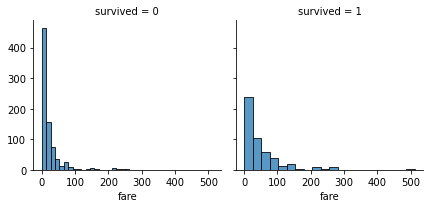

In [36]:
import seaborn as sns

fg = sns.FacetGrid(titanic_data, palette='husl', col='survived')
fg.map(sns.histplot, "fare", bins=20)
fg.add_legend()

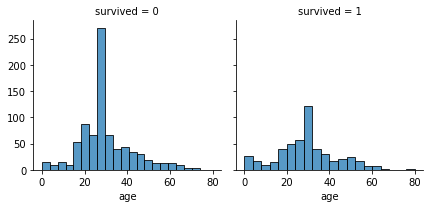

In [37]:
fg = sns.FacetGrid(titanic_data, palette='husl', col='survived')
fg.map(sns.histplot, "age", bins=20)
fg.add_legend()

### Bin Numerical Data

One technique used when dealing with ranges of numerical data is creating bins that reflect patterns in the data. This is one way to include outliers which in turn may create noise. Binning allows you to put observations within a certain range in the same bin. 

In this case, we can use the pandas function qcut() to bin the age column.

<AxesSubplot:>

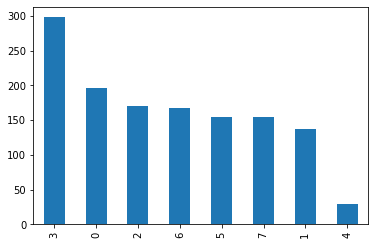

In [38]:
#Binning the age column 
titanic_data['age_bin'] = pd.qcut(titanic_data.age, q=8, labels=False )

#Plotting this column
titanic_data['age_bin'].value_counts().plot(kind='bar')

### Feature Scaling

#### Normalization

- Normalization rescales the values so they are between the [0,1] range. 
- It subtracts the minimum value from each value and divides it by the maximum minus the minimum value. 
- It is also known as Min-Max scaling.

<img src="Normalization Formula.PNG">

We can use the <b>min()</b> and <b>max()</b> methods in pandas to normalize our age column.

In [58]:
#Let's copy the dataset so we can 
data = titanic_data.copy()
data

,pclass,survived,age,sibsp,parch,fare,has_cabin,has_boat,has_body,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other,age_bin
0,1,1,29.0,0,0,211.3375,True,True,False,0,0,1,1,0,0,0,4
1,1,1,1.0,1,2,151.5500,True,True,False,1,0,1,0,0,0,0,0
2,1,0,2.0,1,2,151.5500,True,False,False,0,0,1,1,0,0,0,0
3,1,0,30.0,1,2,151.5500,True,False,True,1,0,1,0,1,0,0,5
4,1,0,25.0,1,2,151.5500,True,False,False,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.0,1,0,14.4542,False,False,True,0,0,0,1,0,0,0,0
1305,3,0,28.0,1,0,14.4542,False,False,False,0,0,0,1,0,0,0,3
1306,3,0,26.0,0,0,7.2250,False,False,True,1,0,0,0,1,0,0,2
1307,3,0,27.0,0,0,7.2250,False,False,False,1,0,0,0,1,0,0,2


In [72]:
# Applying normalization technique by using pandas min and max methods
column = 'age'
data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())    
  
# View normalized data
data.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin,has_boat,has_body,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other,age_bin
0,1,1,0.3625,0,0,211.3375,True,True,False,0,0,1,1,0,0,0,4
1,1,1,0.0125,1,2,151.5500,True,True,False,1,0,1,0,0,0,0,0
2,1,0,0.0250,1,2,151.5500,True,False,False,0,0,1,1,0,0,0,0
3,1,0,0.3750,1,2,151.5500,True,False,True,1,0,1,0,1,0,0,5
4,1,0,0.3125,1,2,151.5500,True,False,False,0,0,1,0,0,1,0,2


In [73]:
#Let's plot the age column to see 
import plotly.express as px

hist = px.histogram(data,x = "age", opacity = 0.7)
hist

#### Standardization

- Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. 
- This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
- Standardized Measurement = (original measurement – mean of the variable) divided by (standard deviation of the variable)

<img src="Standardization Formula.PNG">

In [74]:
# Applying standardization technique by using pandas mean and standard deviation methods
column = 'fare'
data[column] = (data[column] - data[column].mean()) / data[column].std()    
  
# View normalized data  
data.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin,has_boat,has_body,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Other,age_bin
0,1,1,0.3625,0,0,3.441269,True,True,False,0,0,1,1,0,0,0,4
1,1,1,0.0125,1,2,2.285765,True,True,False,1,0,1,0,0,0,0,0
2,1,0,0.0250,1,2,2.285765,True,False,False,0,0,1,1,0,0,0,0
3,1,0,0.3750,1,2,2.285765,True,False,True,1,0,1,0,1,0,0,5
4,1,0,0.3125,1,2,2.285765,True,False,False,0,0,1,0,0,1,0,2


In [75]:
fare_hist = px.histogram(data,x = "fare", opacity = 0.7)
fare_hist

### Correlation 

- Spearman and Pearson are two statistical methods used to calculate the strength of correlation between 2 variables. 

- <b>Pearson Correlation Coefficient </b> can be used with continuous variables that have linear relationship. 

- <b>Spearman Correlation Coefficient </b> can be used when you have a non-linear relationship or ordinal categorical variables.

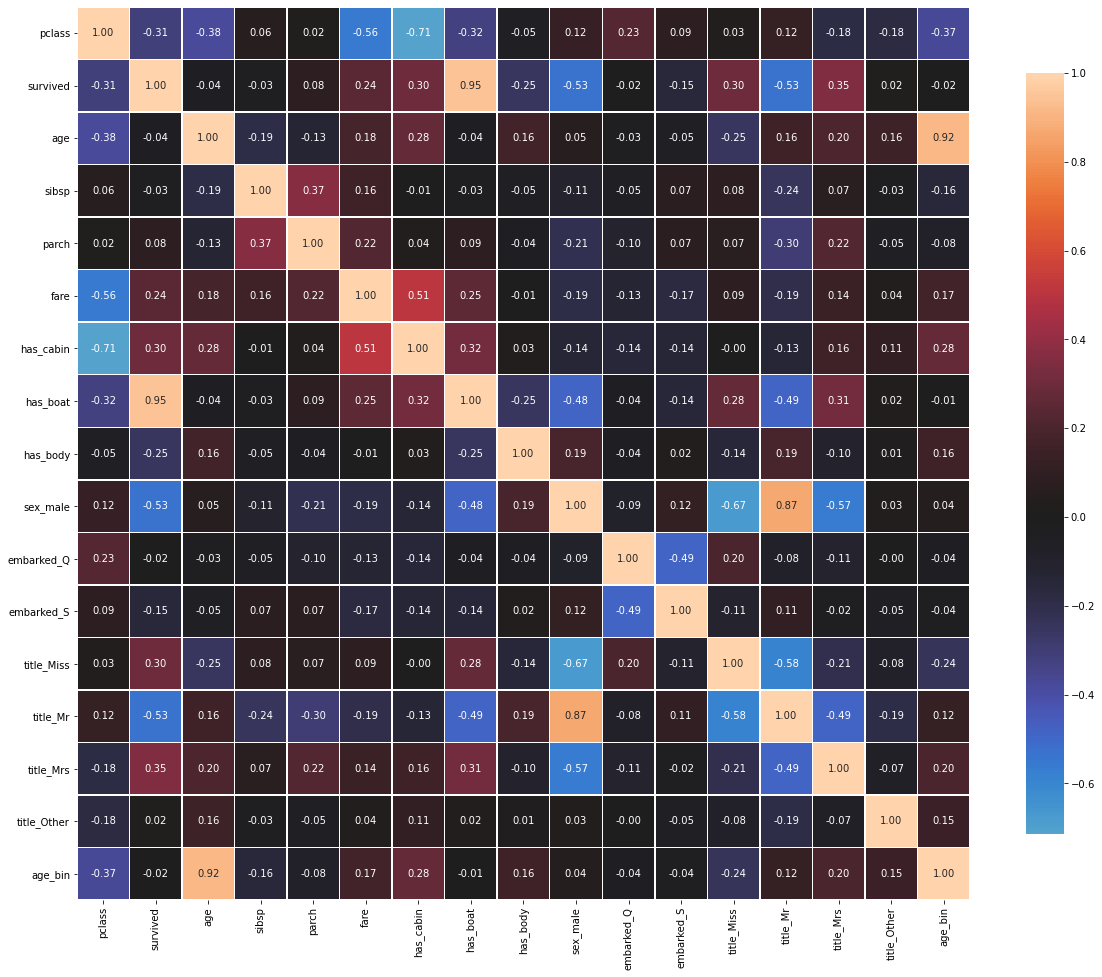

In [85]:
def correlation_heatmap(data):
    correlations = data.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(data)

To avoid multicollinearity, we must now remove features with high correlation:
- age <> age_bin
- has_boat <> survived
- title_Mr <> sex_male

# Lab 

TBD